Leitura e análise dos resultados dos experimentos das lacunas seguidas:
-----------
* 1 a 100 (com granularidade 1) 
* 150 a 2100 (com granularidade 50)

In [26]:
length(seq(110,2160,10))
length(seq(110,2160,10))*30
120*30

[1] 206

[1] 6180

[1] 3600

In [1]:
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
library(grid)


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
#lendo os arquivos dos experimentos dos experimentos de 1 a 2100
mal150_2100=as.data.frame(read.table("IOT/150-2100/grouped_mal.txt"))
kal150_2100=as.data.frame(read.table("IOT/150-2100/grouped_kal.txt"))
sti150_2100=as.data.frame(read.table("IOT/150-2100/grouped_sti.txt"))

names(mal150_2100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal150_2100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti150_2100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

func <- function(i){
    ob=c(i,i+40,i+80)
    
    return(ob)
}

#Tirando a média do experimentos de 150_2100
tamanhoGap150_2100= seq(150,2100,50) 

mediaKal150_2100=c()
mediaMal150_2100=c()
mediaSti150_2100=c()

sdKal150_2100=c()
sdMal150_2100=c()
sdSti150_2100=c()

mediaLacKal150_2100=c()
mediaLacMal150_2100=c()
mediaLacSti150_2100=c()

sdLacKal150_2100=c()
sdLacMal150_2100=c()
sdLacSti150_2100=c()

a=c()

for(z in seq(1,40,1)){
    for (i in seq(z,3600,120)){
        a=(func(i))
        #print(a)        
        # Calculando a média
        mediaLacKal150_2100=append(mediaLacKal150_2100, mean(kal150_2100$time[a])) 
        mediaLacMal150_2100=append(mediaLacMal150_2100, mean(mal150_2100$time[a])) 
        mediaLacSti150_2100=append(mediaLacSti150_2100, mean(sti150_2100$time[a]))

        #calculando o desvio padrão
        sdLacKal150_2100=append(sdLacKal150_2100, sd(kal150_2100$time[a])) 
        sdLacMal150_2100=append(sdLacMal150_2100, sd(mal150_2100$time[a])) 
        sdLacSti150_2100=append(sdLacSti150_2100, sd(sti150_2100$time[a])) 
    }
}



for (i in seq(1,1200,30)) {
    #calculando a média
	mediaKal150_2100=append(mediaKal150_2100,(mean(mediaLacKal150_2100[i:(i+29)])))
	mediaMal150_2100=append(mediaMal150_2100,(mean(mediaLacMal150_2100[i:(i+29)])))
	mediaSti150_2100=append(mediaSti150_2100,(mean(mediaLacSti150_2100[i:(i+29)])))

    #calculando o devio padrão
	sdKal150_2100=append(sdKal150_2100,(sd(sdLacKal150_2100[i:(i+29)])))
	sdMal150_2100=append(sdMal150_2100,(sd(sdLacMal150_2100[i:(i+29)])))
	sdSti150_2100=append(sdSti150_2100,(sd(sdLacSti150_2100[i:(i+29)])))
}
mediaKal150_2100=as.data.frame(mediaKal150_2100)
names(mediaKal150_2100)=c("media")
mediaKal150_2100$sd=sdKal150_2100
mediaKal150_2100$tamanho=tamanhoGap150_2100
mediaKal150_2100$algoritmo="Kalman"


mediaMal150_2100=as.data.frame(mediaMal150_2100)
names(mediaMal150_2100)=c("media")
mediaMal150_2100$sd=sdMal150_2100
mediaMal150_2100$tamanho=tamanhoGap150_2100
mediaMal150_2100$algoritmo="Moving Average"


mediaSti150_2100=as.data.frame(mediaSti150_2100)
names(mediaSti150_2100)=c("media")
mediaSti150_2100$sd=sdSti150_2100
mediaSti150_2100$tamanho=tamanhoGap150_2100
mediaSti150_2100$algoritmo="Stine"



In [12]:
#lendo os arquivos dos experimentos dos experimentos de 1 a 100 de lacunas seguidas 

mal1_100=as.data.frame(read.table("IOT/0-100/grouped_mal (1).txt"))
kal1_100=as.data.frame(read.table("IOT/0-100/grouped_kal.txt"))
sti1_100=as.data.frame(read.table("IOT/0-100/grouped_sti.txt"))
spl1_100=as.data.frame(read.table("IOT/0-100/grouped_spl.txt"))
ssa1_100=as.data.frame(read.table("IOT/0-100/grouped_ssa.txt"))

names(mal1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(spl1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(ssa1_100)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

#função de auxilio para a extração dos resultados 
func <- function(i){
    ob=c(i,i+100,i+200)
    
    return(ob)
}

#variáveis de auxilio
tamanhoGap1_100= seq(1,100,1) 
mediaSpl1_100=c()
mediaKal1_100=c()
mediaMal1_100=c()
mediaSti1_100=c()
mediaSsa1_100=c()

sdSpl1_100=c()
sdKal1_100=c()
sdMal1_100=c()
sdSti1_100=c()
sdSsa1_100=c()

varSpl1_100=c()
varKal1_100=c()
varMal1_100=c()
varSti1_100=c()
varSsa1_100=c()

sdLacSpl1_100=c()
sdLacKal1_100=c()
sdLacMal1_100=c()
sdLacSti1_100=c()
sdLacSsa1_100=c()

varLacSpl1_100=c()
varLacKal1_100=c()
varLacMal1_100=c()
varLacSti1_100=c()
varLacSsa1_100=c()

mediaLacSpl1_100=c()
mediaLacKal1_100=c()
mediaLacMal1_100=c()
mediaLacSti1_100=c()
mediaLacSsa1_100=c()

a=c()

for(z in seq(1,100,1)){
    for (i in seq(z,9000,300)){
        a=(func(i))
#        print(a)        
       # Calculando a média dos treŝ experimentos por dia, distribuidos na amostra
        mediaLacSpl1_100=append(mediaLacSpl1_100, mean(spl1_100$time[a])) 
        mediaLacKal1_100=append(mediaLacKal1_100, mean(kal1_100$time[a])) 
        mediaLacMal1_100=append(mediaLacMal1_100, mean(mal1_100$time[a])) 
        mediaLacSti1_100=append(mediaLacSti1_100, mean(sti1_100$time[a]))
        mediaLacSsa1_100=append(mediaLacSsa1_100, mean(ssa1_100$time[a]))
        
        #calculando o desvio padrão  dos treŝ experimentos por dia, distribuidos na amostra
        sdLacSpl1_100=append(sdLacSpl1_100, sd(spl1_100$time[a])) 
        sdLacKal1_100=append(sdLacKal1_100, sd(kal1_100$time[a])) 
        sdLacMal1_100=append(sdLacMal1_100, sd(mal1_100$time[a])) 
        sdLacSti1_100=append(sdLacSti1_100, sd(sti1_100$time[a])) 
        sdLacSsa1_100=append(sdLacSsa1_100, sd(ssa1_100$time[a])) 
        
        
        #calculando a variancia  dos treŝ experimentos por dia, distribuidos na amostra
        varLacSpl1_100=append(varLacSpl1_100, var(spl1_100$time[a])) 
        varLacKal1_100=append(varLacKal1_100, var(kal1_100$time[a])) 
        varLacMal1_100=append(varLacMal1_100, var(mal1_100$time[a])) 
        varLacSti1_100=append(varLacSti1_100, var(sti1_100$time[a])) 
        varLacSsa1_100=append(varLacSsa1_100, var(ssa1_100$time[a])) 
    }
}


for (i in seq(1,3000,30)) {
    #calculando a média dos experimentos de tamanho i pelas 30 amostras (30 dias, 30 amostras, 3 por dia) ou seja,  
    #primeiro tirei a média das três observações do dia, depois tirei a média das 30 observações (do mês) 
	mediaSpl1_100=append(mediaSpl1_100,(mean(mediaLacSpl1_100[i:(i+29)])))
	mediaKal1_100=append(mediaKal1_100,(mean(mediaLacKal1_100[i:(i+29)])))
	mediaMal1_100=append(mediaMal1_100,(mean(mediaLacMal1_100[i:(i+29)])))
	mediaSti1_100=append(mediaSti1_100,(mean(mediaLacSti1_100[i:(i+29)])))
	mediaSsa1_100=append(mediaSsa1_100,(mean(mediaLacSsa1_100[i:(i+29)])))

    #calculando o devio padrão
	sdSpl1_100=append(sdSpl1_100,(mean(sdLacSpl1_100[i:(i+29)])))
	sdKal1_100=append(sdKal1_100,(mean(sdLacKal1_100[i:(i+29)])))
	sdMal1_100=append(sdMal1_100,(mean(sdLacMal1_100[i:(i+29)])))
	sdSti1_100=append(sdSti1_100,(mean(sdLacSti1_100[i:(i+29)])))
	sdSsa1_100=append(sdSsa1_100,(mean(sdLacSsa1_100[i:(i+29)])))
    
        #calculando a variancia
	varSpl1_100=append(varSpl1_100,(mean(varLacSpl1_100[i:(i+29)])))
	varKal1_100=append(varKal1_100,(mean(varLacKal1_100[i:(i+29)])))
	varMal1_100=append(varMal1_100,(mean(varLacMal1_100[i:(i+29)])))
	varSti1_100=append(varSti1_100,(mean(varLacSti1_100[i:(i+29)])))
	varSsa1_100=append(varSsa1_100,(mean(varLacSsa1_100[i:(i+29)])))
}


mediaKal1_100=as.data.frame(mediaKal1_100)
names(mediaKal1_100)=c("media")
mediaKal1_100$sd=sdKal1_100
#mediaKal1_100$var=varKal1_100
mediaKal1_100$tamanho=tamanhoGap1_100
mediaKal1_100$algoritmo="Kalman"

mediaMal1_100=as.data.frame(mediaMal1_100)
names(mediaMal1_100)=c("media")
mediaMal1_100$sd=sdMal1_100
#mediaMal1_100$var=varMal1_100
mediaMal1_100$tamanho=tamanhoGap1_100
mediaMal1_100$algoritmo="Moving Average"


mediaSti1_100=as.data.frame(mediaSti1_100)
names(mediaSti1_100)=c("media")
mediaSti1_100$sd=sdSti1_100
#mediaSti1_100$var=varSti1_100
mediaSti1_100$tamanho=tamanhoGap1_100
mediaSti1_100$algoritmo="Stine"

mediaSpl1_100=as.data.frame(mediaSpl1_100)
names(mediaSpl1_100)=c("media")
mediaSpl1_100$sd=sdSpl1_100
#mediaSpl1_100$var=varSpl1_100
mediaSpl1_100$tamanho=tamanhoGap1_100
mediaSpl1_100$algoritmo="Spline"

mediaSsa1_100=as.data.frame(mediaSsa1_100)
names(mediaSsa1_100)=c("media")
mediaSsa1_100$sd=sdSsa1_100
#mediaSsa1_100$var=varSsa1_100
mediaSsa1_100$tamanho=tamanhoGap1_100
mediaSsa1_100$algoritmo="SSA"

In [13]:
todos=rbind(mediaKal1_100,
            mediaMal1_100,
            mediaSti1_100,
           # mediaSpl1_100,
          #  mediaSsa1_100,
            mediaKal150_2100,
            mediaMal150_2100,
            mediaSti150_2100)
summary(todos)

     media             sd             tamanho         algoritmo        
 Min.   :1.190   Min.   :0.00798   Min.   :   1.00   Length:420        
 1st Qu.:1.274   1st Qu.:0.01735   1st Qu.:  35.75   Class :character  
 Median :1.328   Median :0.01991   Median :  70.50   Mode  :character  
 Mean   :1.369   Mean   :0.02007   Mean   : 357.50                     
 3rd Qu.:1.401   3rd Qu.:0.02276   3rd Qu.: 362.50                     
 Max.   :2.761   Max.   :0.04745   Max.   :2100.00                     

In [15]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a
write.table(a,"AR-seguidos-TEMPO-IOT.txt")

tamanho,algoritmo,media
1,Moving Average,1.195857
2,Moving Average,1.197259
3,Moving Average,1.198628
4,Moving Average,1.196153
5,Moving Average,1.198039
6,Moving Average,1.203206
7,Moving Average,1.203626
8,Moving Average,1.194645
9,Moving Average,1.190094
10,Moving Average,1.198056


In [5]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a
write.table(a,"AR-seguidos-TEMPO-IOT.txt")

tamanho,algoritmo,media
1,Moving Average,1.238125
2,Moving Average,1.237991
3,Moving Average,1.244067
4,Moving Average,1.247845
5,Moving Average,1.245243
6,Moving Average,1.239554
7,Moving Average,1.241574
8,Moving Average,1.242396
9,Moving Average,1.243504
10,Moving Average,1.243498


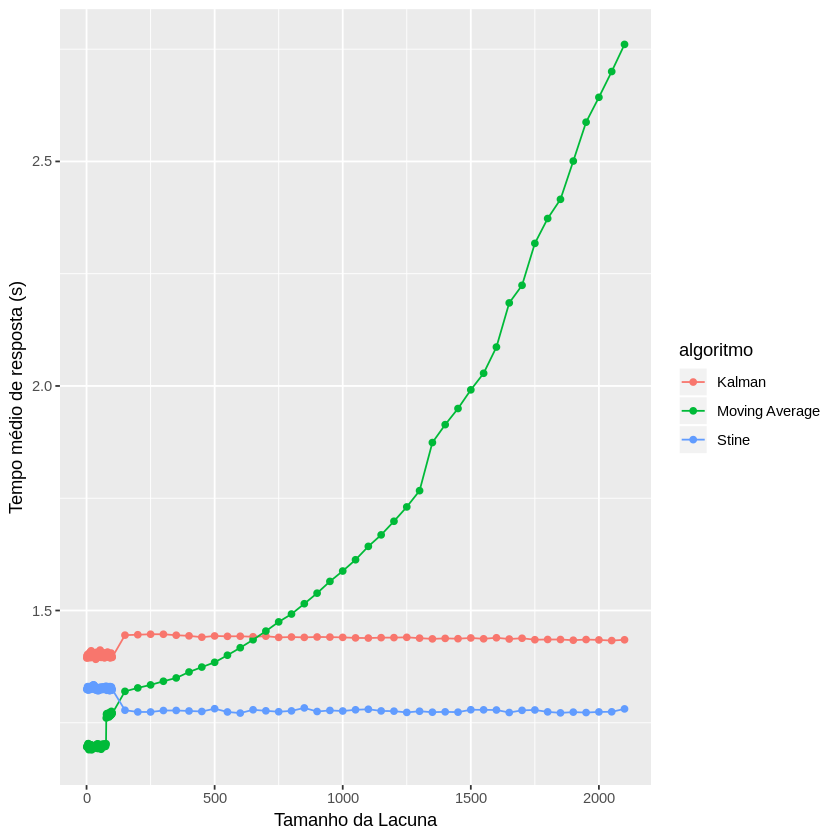

In [14]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="Tempo médio de resposta (s)", x="Tamanho da Lacuna")
    

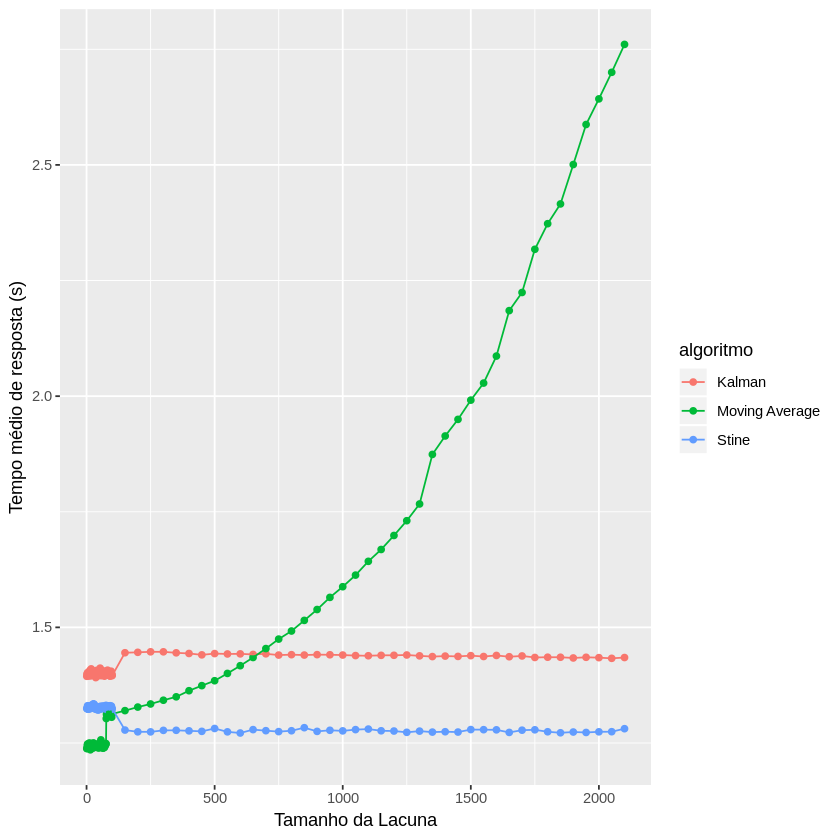

In [6]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="Tempo médio de resposta (s)", x="Tamanho da Lacuna")
    

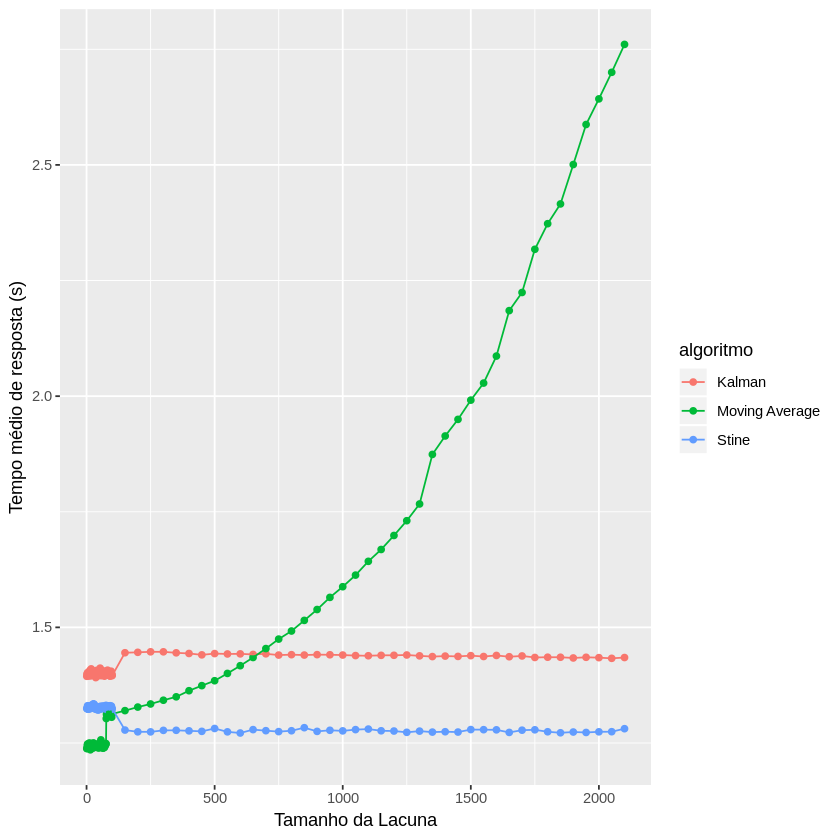

In [7]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="Tempo médio de resposta (s)", x="Tamanho da Lacuna")
    

In [8]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 100, 30 de tamanho 200... 30 de tamanho 4200
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

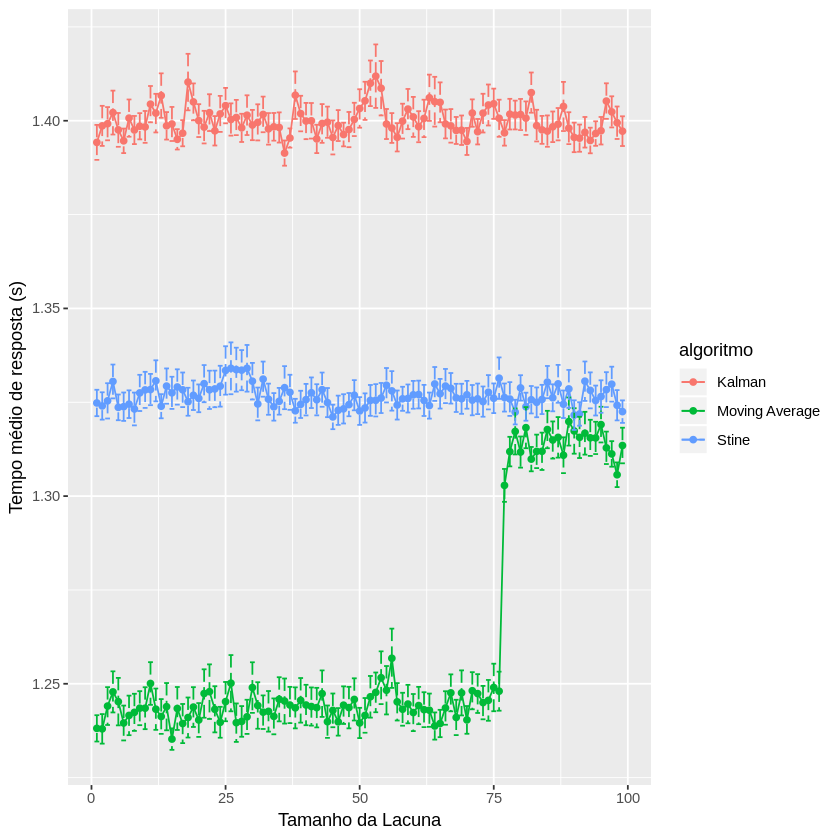

In [9]:
graph1_100=ggplot(todos[which(todos$tamanho<100 ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11)+
    labs(y="Tempo médio de resposta (s)", x="Tamanho da Lacuna") 
graph1_100

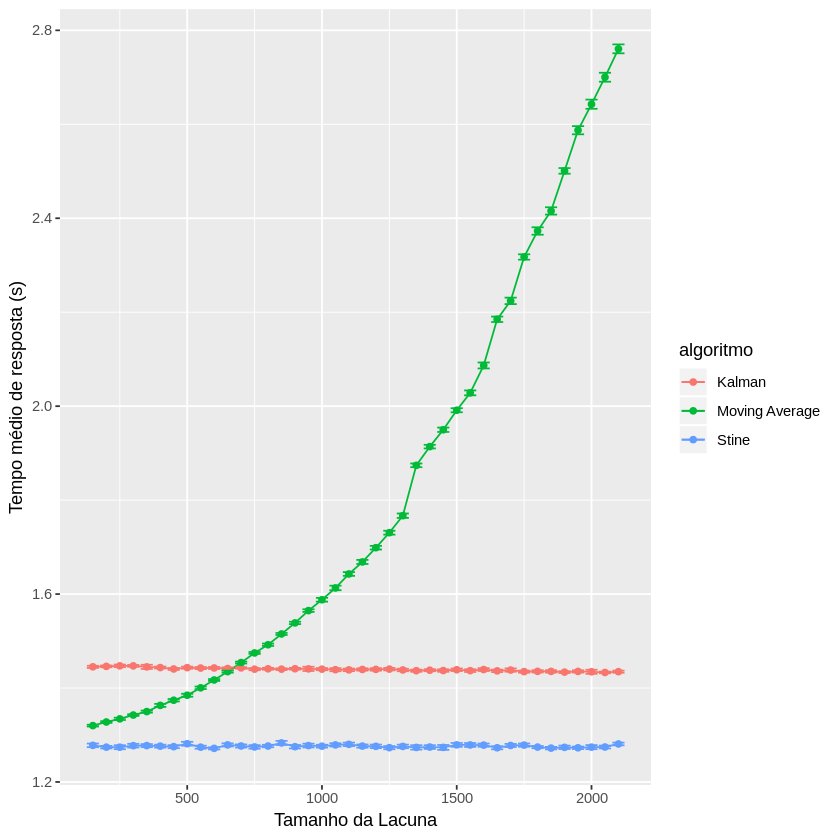

In [10]:
graph150_2100=ggplot(todos[which(todos$tamanho>100),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=1)+
    labs(y="Tempo médio de resposta (s)", x="Tamanho da Lacuna")
graph150_2100

NULL

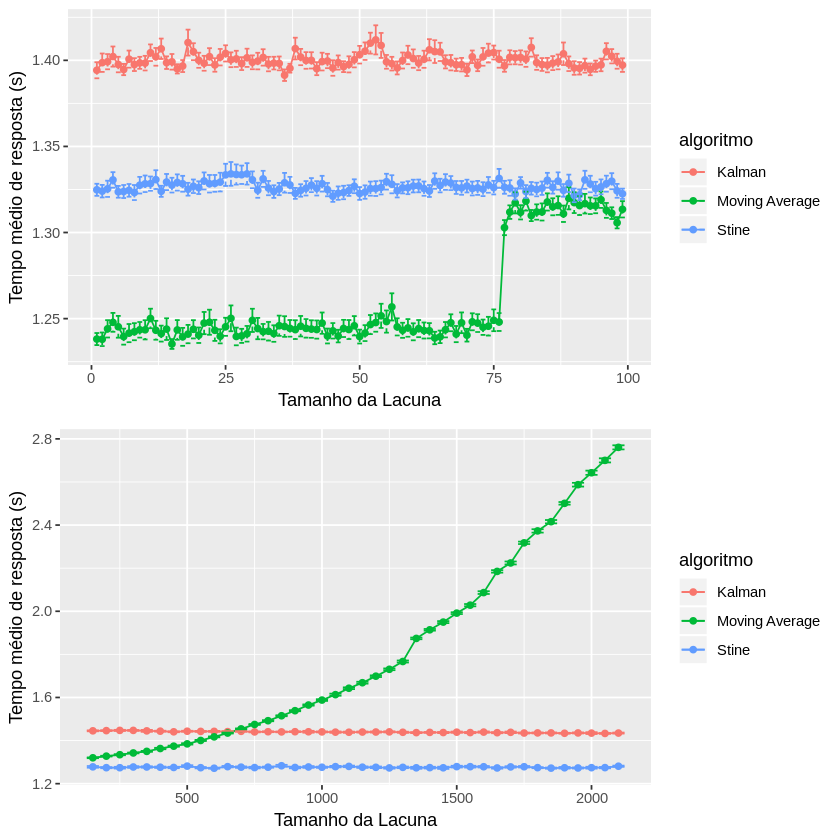

In [11]:
pushViewport(viewport(layout = grid.layout(2, 1)))[]
print(graph1_100,    vp = viewport(layout.pos.row=1, layout.pos.col=1))
print(graph150_2100, vp = viewport(layout.pos.row=2, layout.pos.col=1))